In [2]:
import sys
sys.path.insert(0, "/data/u934/service_imagerie/v_kapoor/anaconda2/bin/CSBDeep/examples/CAREforCurie/HelperFunctions")
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import tensorflow
from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches
from selectrawdata import SelectRawData

Using TensorFlow backend.


In [3]:
raw_data = SelectRawData.from_folder (
    basepath    = '/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Raw_Datasets/BorialisS1S2/ModelT300/',
    source_dirs = ['Low'],
    target_dir  = 'GT',
    axes        = 'ZYX',
    NumTrain = 1,
    GenerateKeras= True
)

Using Keras generator for creating a transformed image from each input


In [4]:
X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    patch_size          = (16,128,128),
    n_patches_per_image = 256,
    save_file           = '/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Drosophilla/BorialisSiS2Train1.npz',
)

  100 raw images x    1 transformations   =   100 images
  100 images     x  256 patches per image = 25600 patches in total
Input data:
/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Raw_Datasets/BorialisS1S2/ModelT300/: target='GT', sources=['Low'], axes='ZYX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
16 x 128 x 128


100%|██████████| 100/100 [22:19<00:00, 13.39s/it]


Saving data to /data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Drosophilla/BorialisSiS2Train50.npz.


In [5]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (25600, 1, 16, 128, 128)
axes  of X,Y = SCZYX


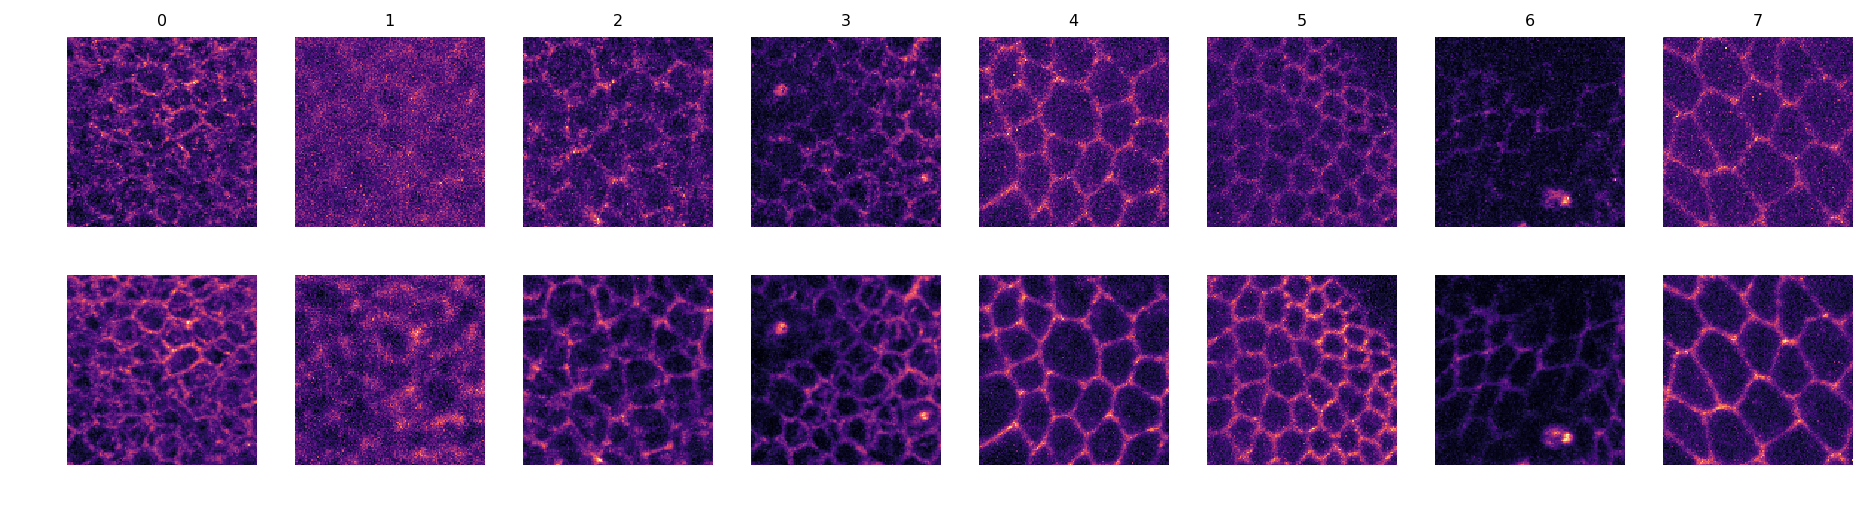

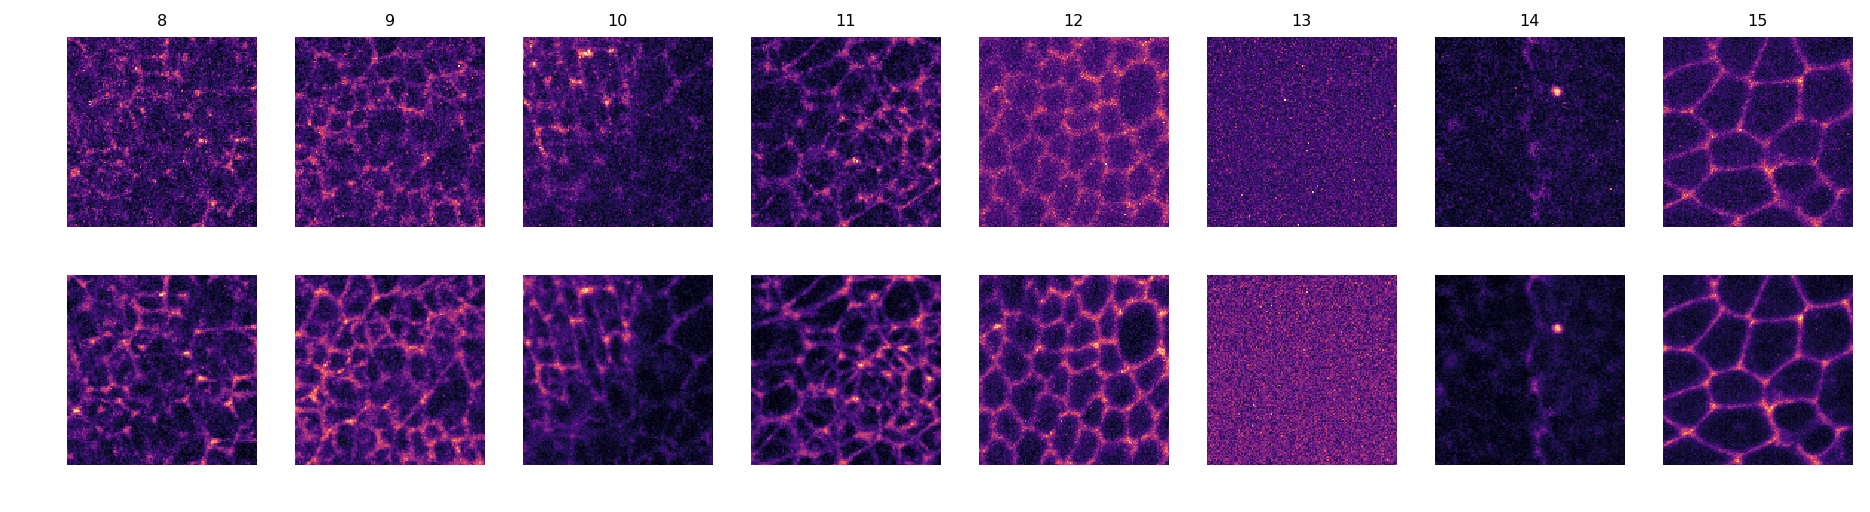

In [6]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;